In [46]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.circuit.library import TwoLocal, ZZFeatureMap, PauliEvolutionGate, QuantumVolume, CDKMRippleCarryAdder, HGate, MCXGate
from qiskit.primitives import Sampler
from qiskit.quantum_info import SparsePauliOp, Pauli
from numpy import pi


## N-local circuits

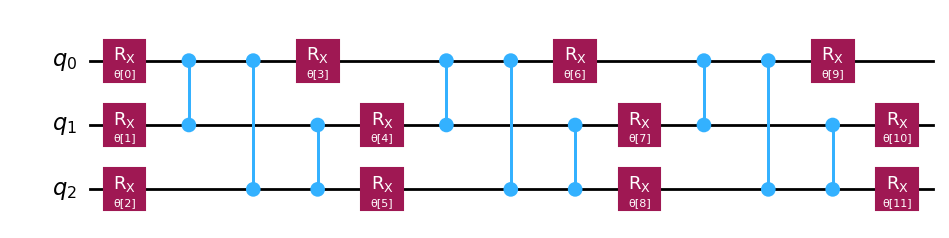

In [3]:
two_local = TwoLocal(3, 'rx', 'cz')
two_local.decompose().draw('mpl')

$N$-local circuits are further documented in [the API docs](https://docs.quantum.ibm.com/api/qiskit/circuit_library#n-local-circuits) and in the [variational algorithm design course](https://learning.quantum.ibm.com/course/variational-algorithm-design).

The parametres above can be set as follows:

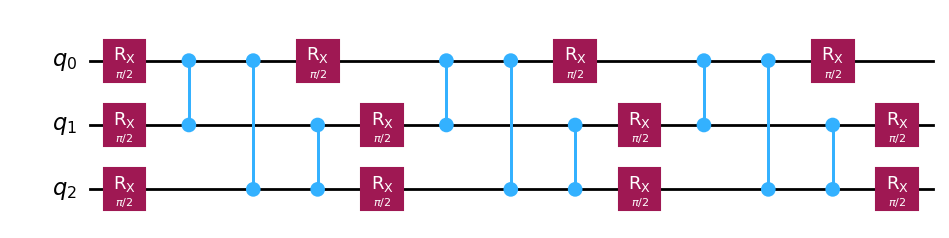

In [16]:
bound_circuit = two_local.assign_parameters({p: pi/2 for p in two_local.parameters})
bound_circuit.decompose().draw('mpl')

## Time Evolution Circuits

In [30]:
hamiltonian = SparsePauliOp(["Z", "X"]) # so this is just a linear combination of Pauli operators
print(hamiltonian.to_matrix())
print(hamiltonian.coeffs) # the coefficients of the linear combination
hamiltonian.coeffs = [0, 1] # they can surprisingly be changed directly
print(hamiltonian.to_matrix())

[[ 1.+0.j  1.+0.j]
 [ 1.+0.j -1.+0.j]]
[1.+0.j 1.+0.j]
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


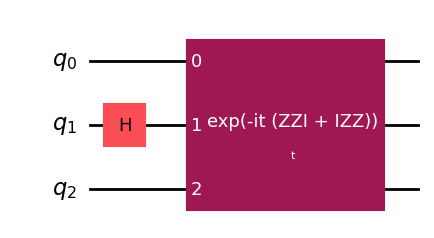

In [39]:
state = QuantumCircuit(3)
state.h(1)

timeParameter = Parameter('t')

hamiltonian = SparsePauliOp(["ZZI", "IZZ"])
evolution = PauliEvolutionGate(hamiltonian, timeParameter)
state.compose(evolution, inplace=True)
state.draw('mpl')

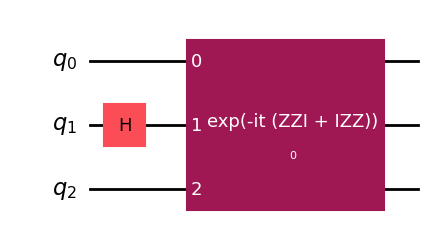

In [42]:
state.assign_parameters({timeParameter: 0}).draw('mpl') #another example of parameter assignment

## Arithmetic Operations

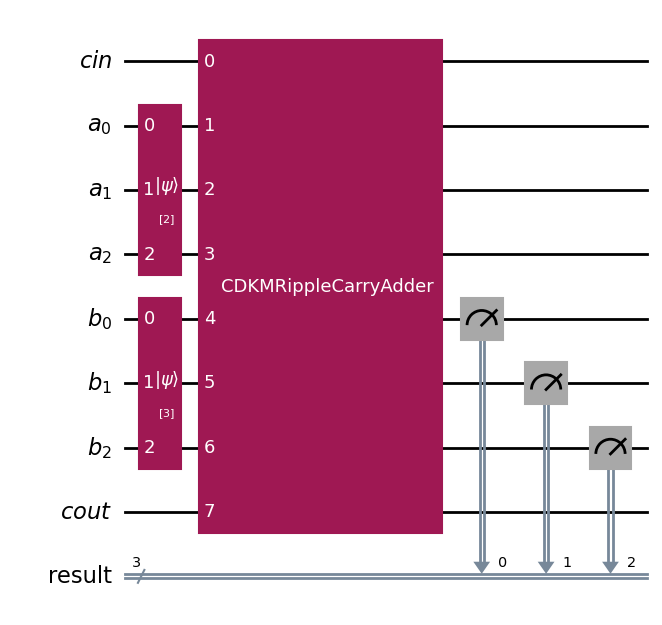

In [77]:
adder = CDKMRippleCarryAdder(3)

reg_a = QuantumRegister(3, 'a')
number_a = QuantumCircuit(reg_a)
number_a.initialize(2)

reg_b = QuantumRegister(3, 'b')
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)

reg_result = ClassicalRegister(3, 'result')
circuit = QuantumCircuit(*adder.qregs, reg_result).compose(number_a, qubits=reg_a).compose(number_b, qubits=reg_b).compose(adder)
circuit.measure(reg_b, reg_result)
circuit.draw('mpl')

We can use the sampler to locally simulate the execution of the above circuit

In [80]:
result = Sampler().run(circuit).result()
result.quasi_dists

[{5: 1.0}]

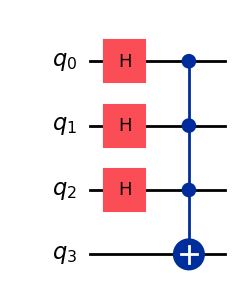

In [85]:
mcx_gate = MCXGate(3) # 3 is the number of control qubits (MCX stands for multi-controlled X)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
for i in range(3):
    qc.append(hadamard_gate, [i])
qc.append(mcx_gate, [0,1,2,3]) # the list represents the qubits that the gate acts on
qc.draw('mpl')

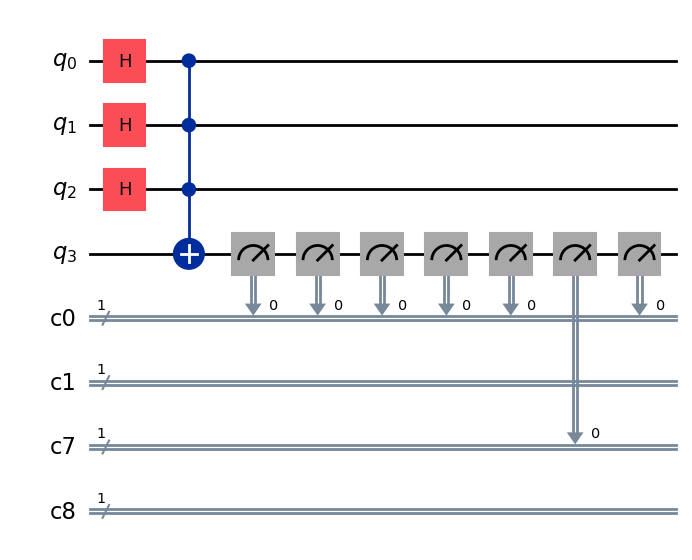

In [97]:
meas3 = ClassicalRegister(1)
qc.add_register(meas3)
qc.measure([3], meas3)
qc.draw('mpl')

In [90]:
Sampler().run(qc).result().quasi_dists[0]

QiskitError: 'Some classical bits are not used for measurements. the number of classical bits (2), the used classical bits ({0}).'